# Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Reading Data

In [4]:
data = pd.read_csv("C:/Users/charu/OneDrive/Desktop/Heart Data.csv")

In [5]:
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [6]:
data.shape

(1319, 9)

# There are total 9 columns:
# Here, 8 fields are for input columns and 1 field is for output column(i.e., class)
#Age, gender(0 for Female, 1 for Male) ,heart rate (impulse), systolic BP (pressurehight), diastolic BP (pressurelow), blood sugar(glucose), CK-MB (kcm), and Test-Troponin (troponin) are representing the input fields, while the output field pertains to the presence of heart attack (class), which is divided into two categories (negative and positive); negative refers to the absence of a heart attack, while positive refers to the presence of a heart attack.

# Understanding Data

In [7]:
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [8]:
data.tail()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive
1318,51,1,94,157,79,134.0,50.89,1.770,positive


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


#Statistical information of data

In [10]:
data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


# Data Preprocessing

In [11]:
data = data.rename(columns = {data.columns[2] : 'impulse', data.columns[3]:'pressurehigh'} )

#For checking correlation of class with other fields, we need to convert it into a numeric field...
Here we took positive as 1 and negative as 0

In [12]:
data['class'] = data['class'].replace('positive', 1)

In [13]:
data['class'] = data['class'].replace('negative', 0)

In [14]:
data.head()

,age,gender,impulse,pressurehigh,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [15]:
data.isnull().sum()

age             0
gender          0
impulse         0
pressurehigh    0
pressurelow     0
glucose         0
kcm             0
troponin        0
class           0
dtype: int64

# No null values are present in the data 

#If any null values would have found, we could use data.dropna(inplace = True) to remove null values

# Checking for any duplicacy

In [16]:
print("Number of duplicate rows: ", data.duplicated().sum())

Number of duplicate rows:  0


#No Duplicates are present

#If any duplicate values would have found, we could use data.drop_duplicates(keep = 'first') to drop duplicates

# Data Visualisation

#Histogram distribution of numerical features in the dataset

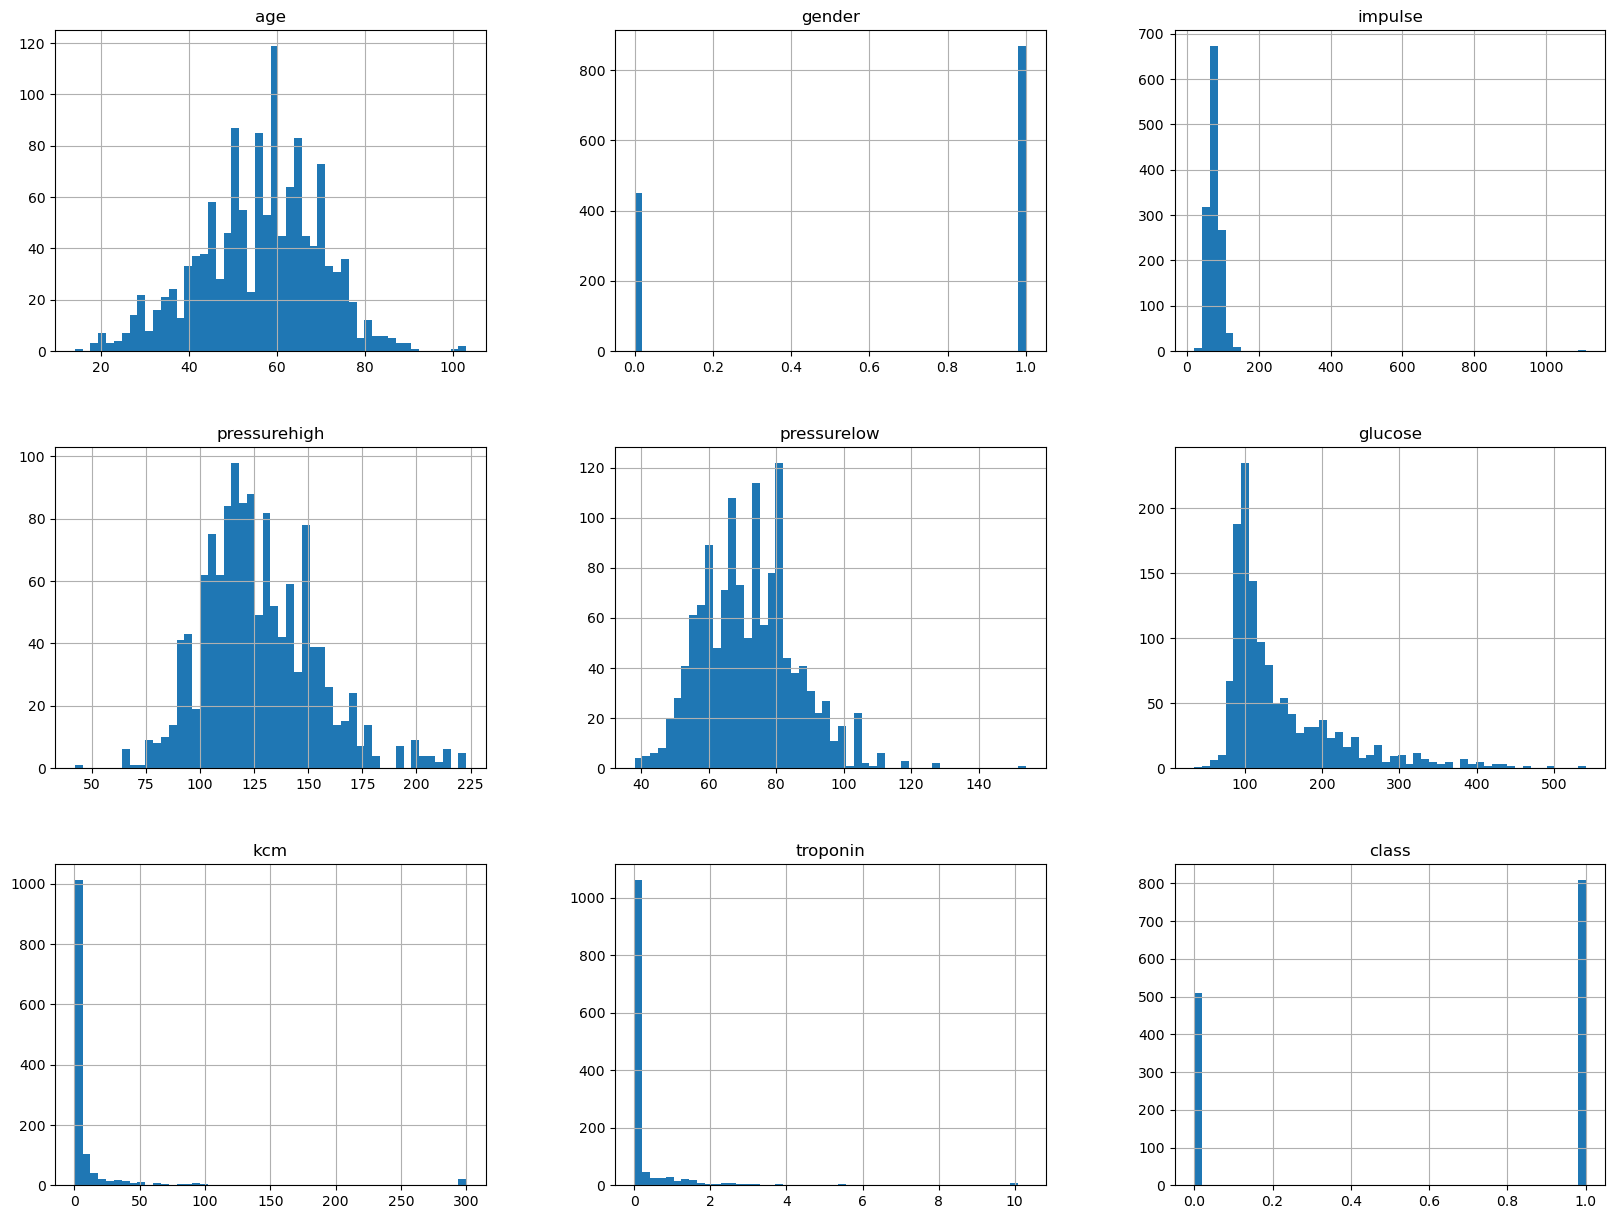

In [17]:
my_hist = data.hist(bins=50 ,figsize= (20 , 15 ))

#Visualization of the outliers

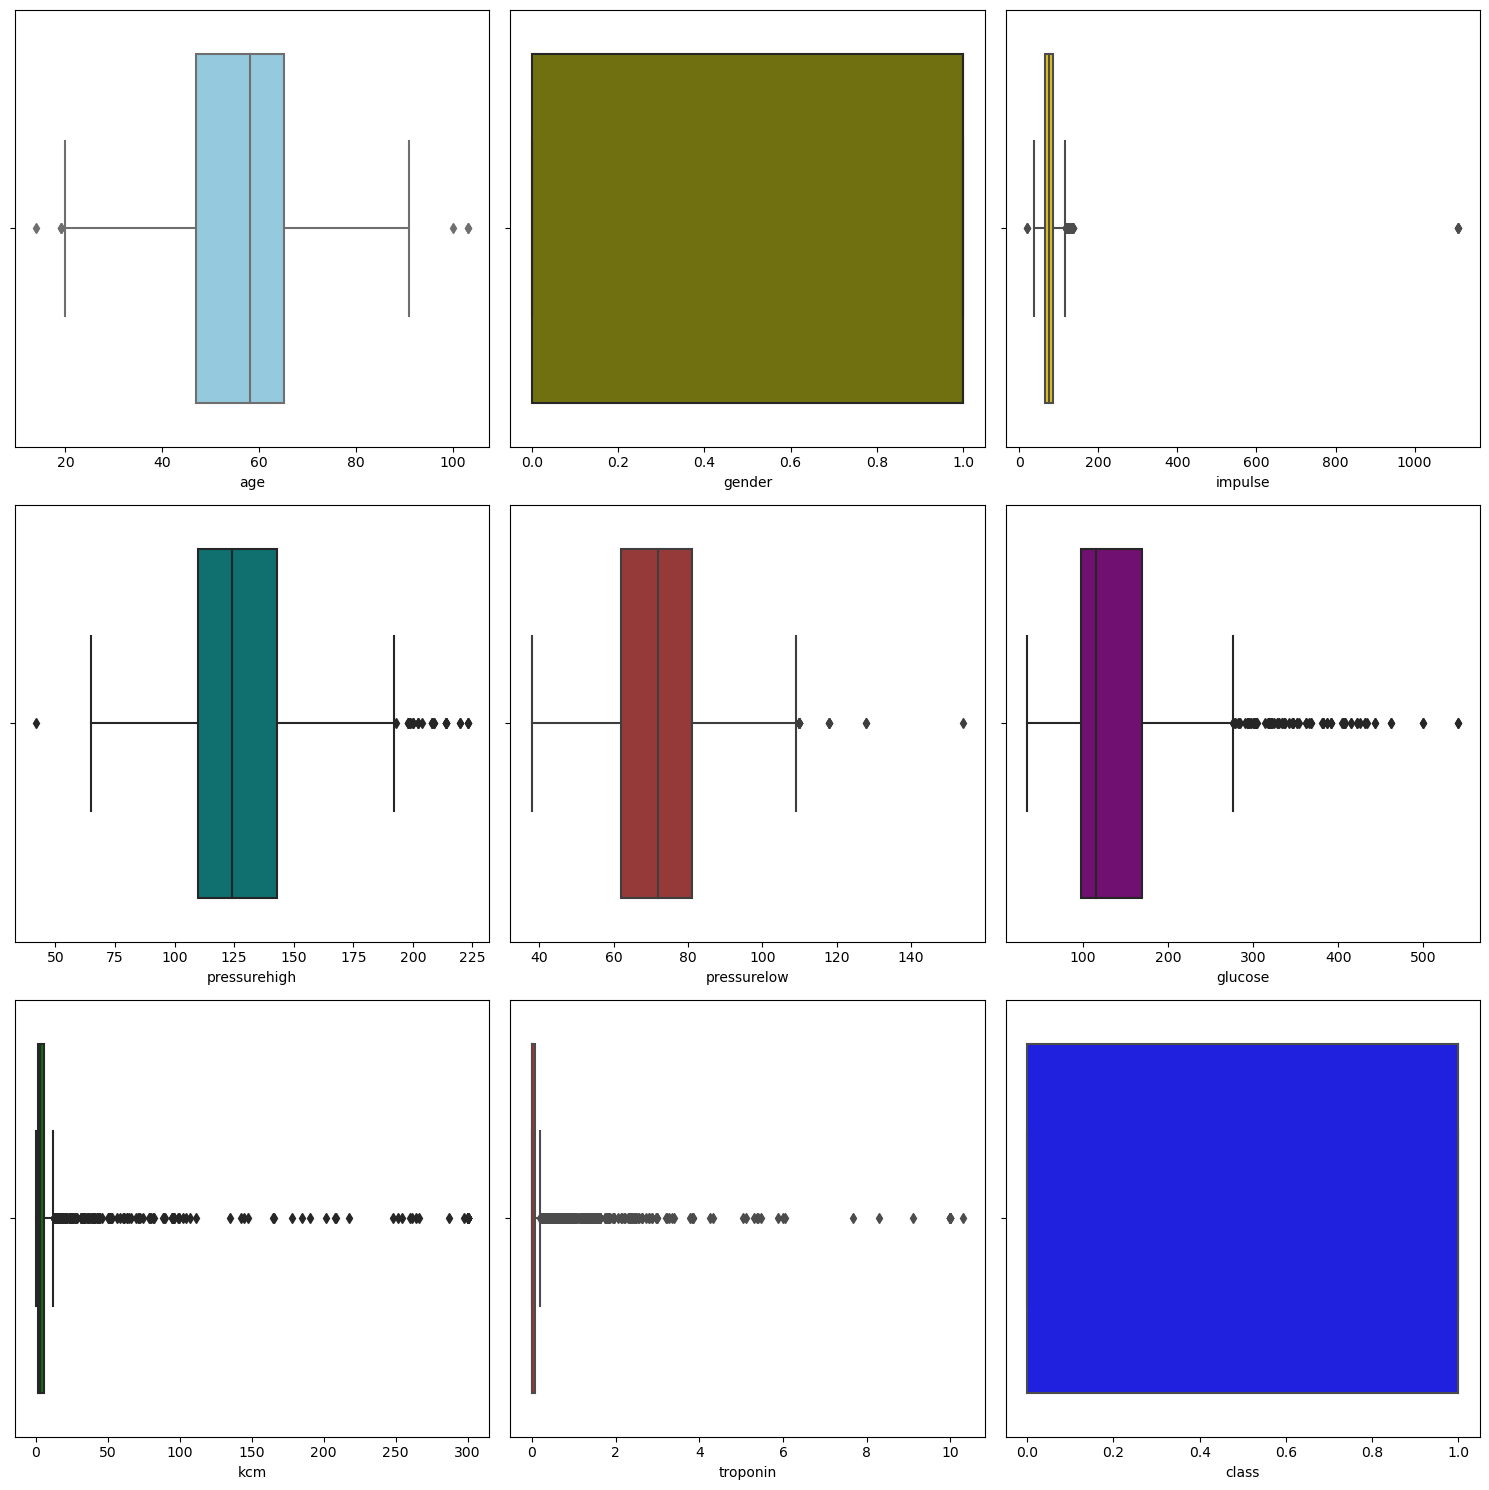

In [18]:
lst1=['age','gender','impulse','pressurehigh','pressurelow','glucose','kcm','troponin','class']
lst_col=['skyblue','olive','gold','teal','brown','purple','green','red','blue']
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False) # Set up the matplotlib figure
axes = axes.flatten()  # Plot a simple histogram with binsize determined automatically
for ax,k,m in zip(axes,lst1,lst_col):
    sns.boxplot(data=data, x=k, color=m, ax=ax)
plt.tight_layout()
plt.show()

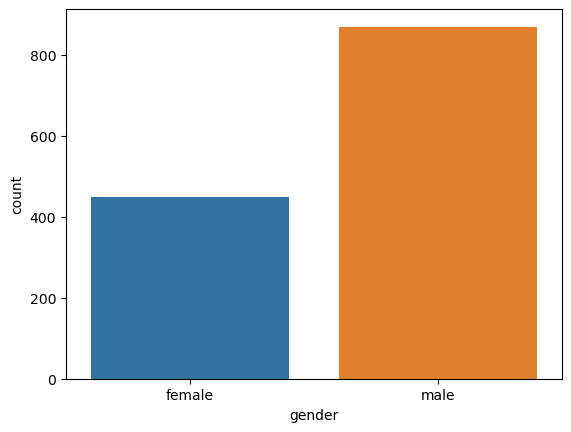

In [19]:
# show the count of females and males in data
gender_label = sns.countplot(x='gender' , data=data )
plt.xticks(ticks=[0,1], labels = ["female", "male"])
plt.show()

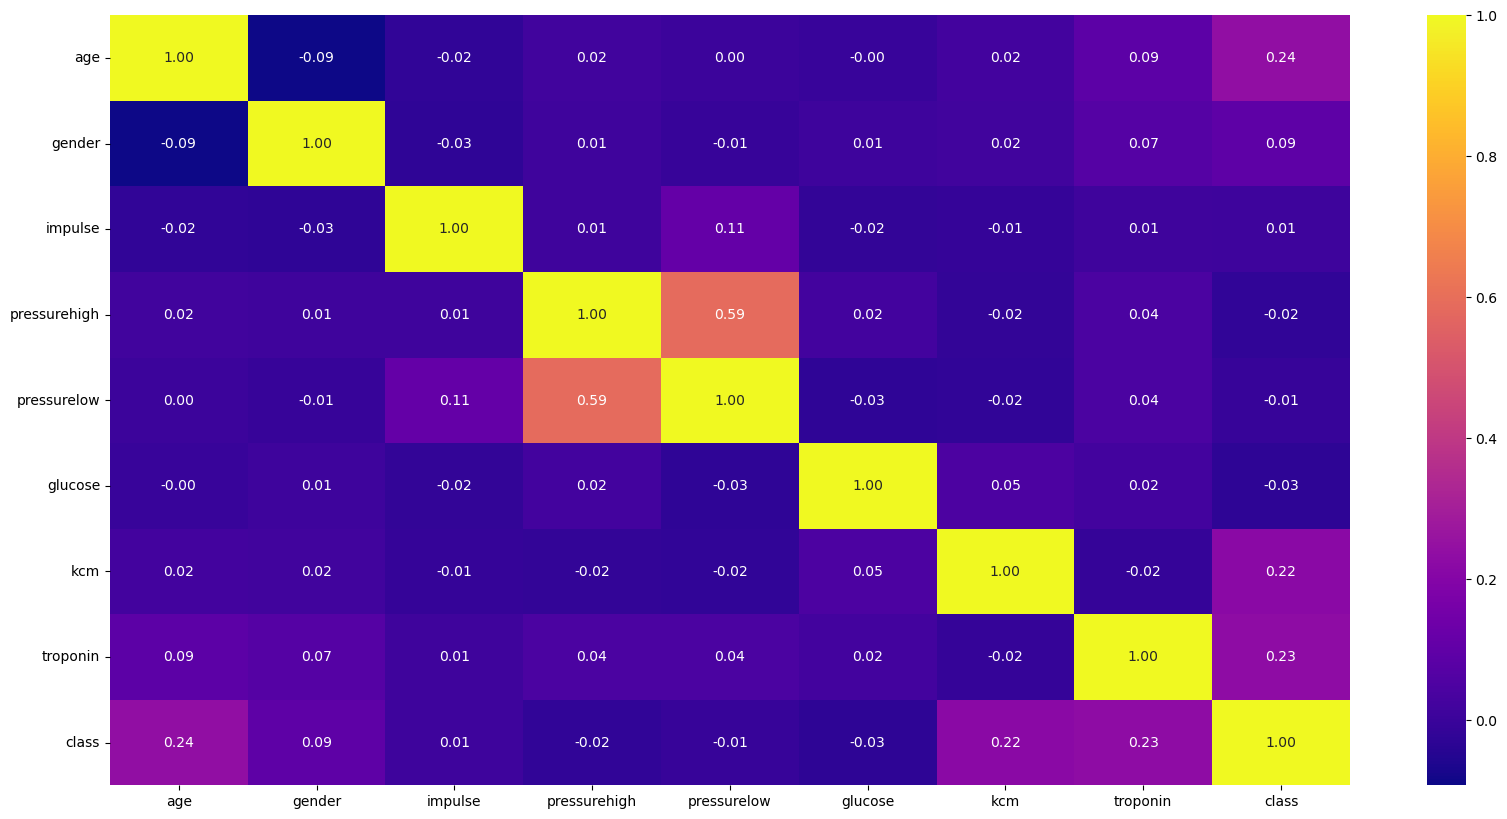

In [20]:
#correlation between numerical values
plt.figure(figsize=(20,10))
#plot heat map
sns.heatmap(data.corr() ,annot=True , cmap='plasma' , linecolor = 'black', fmt='.2f')
plt.show()

# APPLYING DATA MODELS

#Importing required libraries to apply these data models

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Split the whole dataset into features and target, here class is our target field

In [23]:
x= data.drop(columns='class' , axis=1)
y= data['class']

#Random split the dataset into two sets, i.e., the training set(70%) and the testing set(30%)

In [24]:
# Using standard scaler to standardize the attribute values
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x)
x_train_scaled

array([[ 5.72357956e-01,  7.18395402e-01, -2.39032215e-01, ...,
         1.78459449e-01, -2.90961900e-01, -3.02342376e-01],
       [-2.57963993e+00,  7.18395402e-01,  3.03491001e-01, ...,
         1.99434379e+00, -1.84072428e-01,  6.05700979e-01],
       [-8.73625310e-02,  7.18395402e-01, -2.77783874e-01, ...,
         1.64718943e+00, -2.86859072e-01, -3.10140458e-01],
       ...,
       [-8.20385295e-01,  7.18395402e-01,  1.29108539e-01, ...,
        -6.76074358e-01, -3.03054447e-01,  3.36968791e+00],
       [-1.60664807e-01,  7.18395402e-01, -3.94038849e-01, ...,
         3.95710113e+00, -2.04586569e-01, -1.68298262e-03],
       [-3.80571637e-01,  7.18395402e-01,  3.03491001e-01, ...,
        -1.68694910e-01,  7.69079350e-01,  1.22088302e+00]])

# Here, the standardization of dataset is the part of preprocessing.
# feature scaling using StandardScaler to standardize the attribute values of the input features.
# It ensures that each feature has a mean of 0 and a standard deviation of 1, which can help improve the performance and convergence of machine learning algorithms.

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x_train_scaled,y,test_size=0.3,stratify = y, random_state=100)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (923, 8)
X_test shape:  (396, 8)

Y_train shape:  (923,)
Y_test shape:  (396,)


# stratify=y: This ensures that the class distribution is maintained in both the training and testing sets.
# test_size = 0.3 divides dataset into 30% testing data and rest 70% as training data.
# random_state = 100: setting a random state ensures that the data split is consistent across multiple runs of the code.

In [26]:
#this function used to evalute the models with features and target.
result=[]        #Will store the accuracy of each model
def model_fit(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy =accuracy_score(y_test, y_pred)

    result.append(accuracy)

    print(model)
    print("CONFUSION MATRIX:\n",confusion_matrix(y_test, y_pred))
    print(f"ACCURACY :{accuracy}")
    print("CLASSIFICATION REPORT:\n",classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred) , annot=True)

# x_train,x_test: features of training snd testing datasets respectively.
# y_train, y_test: Target labels of training and testing datasets respectively.
#this model_fit function trains a machine learning model, makes predictions on the testing data, calculates accuracy, and provides evaluation metrics to assess the model's performance. Additionally, it visualizes the confusion matrix for further analysis

# Decision Tree Classifier

DecisionTreeClassifier(criterion='entropy', random_state=100)
CONFUSION MATRIX:
 [[149   4]
 [  2 241]]
ACCURACY :0.9848484848484849
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       153
           1       0.98      0.99      0.99       243

    accuracy                           0.98       396
   macro avg       0.99      0.98      0.98       396
weighted avg       0.98      0.98      0.98       396



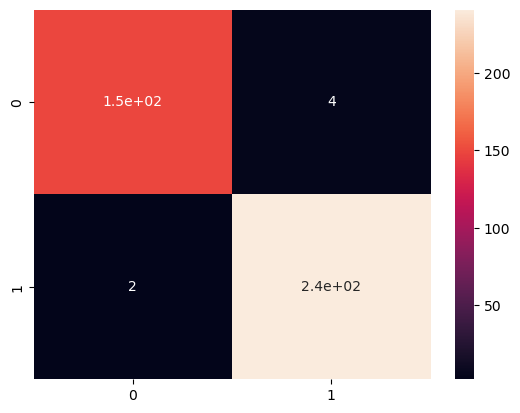

In [27]:
model1 = DecisionTreeClassifier(criterion="entropy", random_state=100)
model_fit(model1, x_train, x_test, y_train,  y_test)

#criterion="entropy": This parameter determines the criterion used for splitting nodes. In this case, "entropy" is chosen, which measures the information gain in the decision tree. 

#random_state=100: This parameter sets the random seed for reproducibility. It ensures that the results will be consistent across different runs of the code. 

# K-Nearest Neighbour(KNN) and SVM(Support Vector Machine) requires feature based scaling as they are distance based algorithms

# SVM (Support Vector Machine) Classifier

SVC(kernel='linear')
CONFUSION MATRIX:
 [[133  20]
 [ 45 198]]
ACCURACY :0.8358585858585859
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.75      0.87      0.80       153
           1       0.91      0.81      0.86       243

    accuracy                           0.84       396
   macro avg       0.83      0.84      0.83       396
weighted avg       0.85      0.84      0.84       396



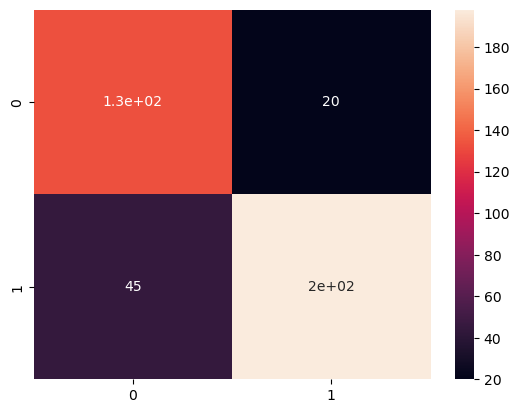

In [28]:
model2=SVC(kernel='linear')
model_fit(model2,x_train,x_test,y_train,y_test)

#kernel='linear': This parameter defines the type of kernel used for the SVM. A linear kernel implies that the decision boundary between classes will be linear. It is suitable for linearly separable datasets.

# KNN(K- Nearest Neighbours) Classifiers

KNeighborsClassifier(n_neighbors=10)
CONFUSION MATRIX:
 [[ 99  54]
 [ 74 169]]
ACCURACY :0.6767676767676768
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.57      0.65      0.61       153
           1       0.76      0.70      0.73       243

    accuracy                           0.68       396
   macro avg       0.67      0.67      0.67       396
weighted avg       0.69      0.68      0.68       396



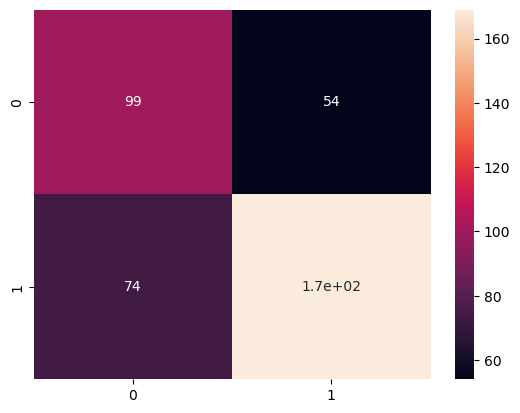

In [29]:
model3=KNeighborsClassifier(n_neighbors=10)
model_fit(model3,x_train,x_test,y_train,y_test)

#n_neighbors=10: This parameter defines the number of neighbors to consider when making predictions. In this case, we set it to 10, meaning the model will consider the 10 nearest neighbors to the query point and use majority voting to classify the point

# CONCLUSION

In [30]:
print("Accuracy of Decision tree Classifier: ",result[0])
print("Accuracy of SVM Classifier: ",result[1])
print("Accuracy of KNN Classifier: ",result[2])

Accuracy of Decision tree Classifier:  0.9848484848484849
Accuracy of SVM Classifier:  0.8358585858585859
Accuracy of KNN Classifier:  0.6767676767676768


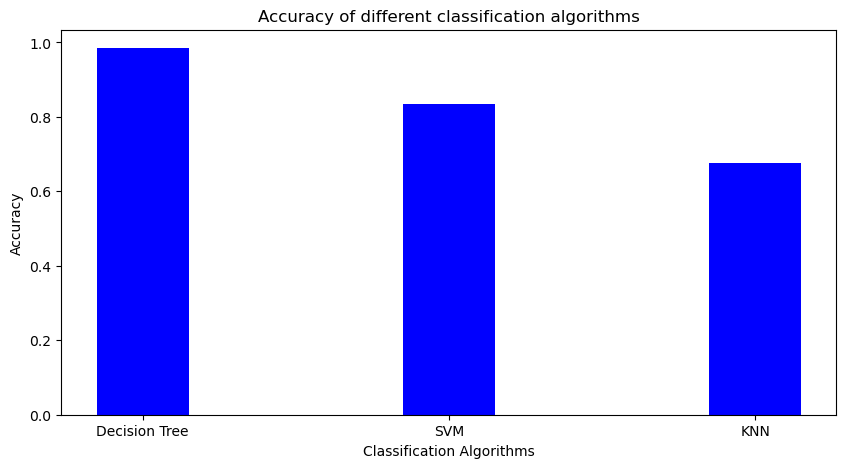

In [35]:
final_result = {'Decision Tree':result[0], 'SVM':result[1], 'KNN':result[2]}
classification_algorithms = list(final_result.keys())
accuracy = list(final_result.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(classification_algorithms, accuracy, color ='blue', 
        width = 0.3)
 
plt.xlabel("Classification Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of different classification algorithms")
plt.show()

# In this dataset Decision Tree Classifier has the highest accuracy, followed by SVM and KNN respectively

# Our results demonstrate the effectiveness of various classification algorithms in predicting heart health outcomes.